In [1]:
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
nx.__version__

'2.6.3'

In [3]:
G1 = nx.read_adjlist('friends.adjlist')

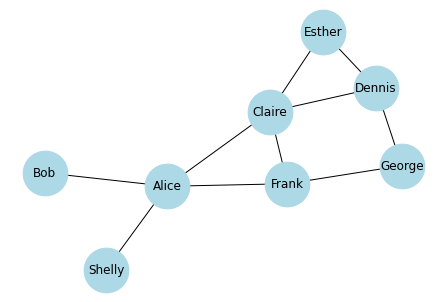

In [4]:
nx.draw(G1, node_size=2000, node_color='lightblue', with_labels=True)

# Q1.

Write a function named get_leaves that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [5]:
def get_leaves(G):
    degrees = G.degree()
    friends = set()
    for name, degree in degrees:
        if degree == 1:
            friends.add(name)
    return friends

get_leaves(G1)

{'Bob', 'Shelly'}

In [6]:
assert set(get_leaves(G1)) == {'Bob', 'Shelly'}

# Q2.

Write a function max_degree that takes a graph as its argument, and returns a dictionary with a node's name as a key and its degree as a value with highest degree.

In [7]:
def max_degree(G):
    degrees = G.degree()
    friends = {}
    max_degree = 0
    for name, degree in degrees:
        if max_degree < degree:
            max_degree = degree
    
    for name, degree in degrees:
        if degree == max_degree:
            friends[name] = max_degree
    return friends

In [8]:
assert max_degree(G1) == {'Alice':4, 'Claire': 4}

# US Airport Linkages

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports:

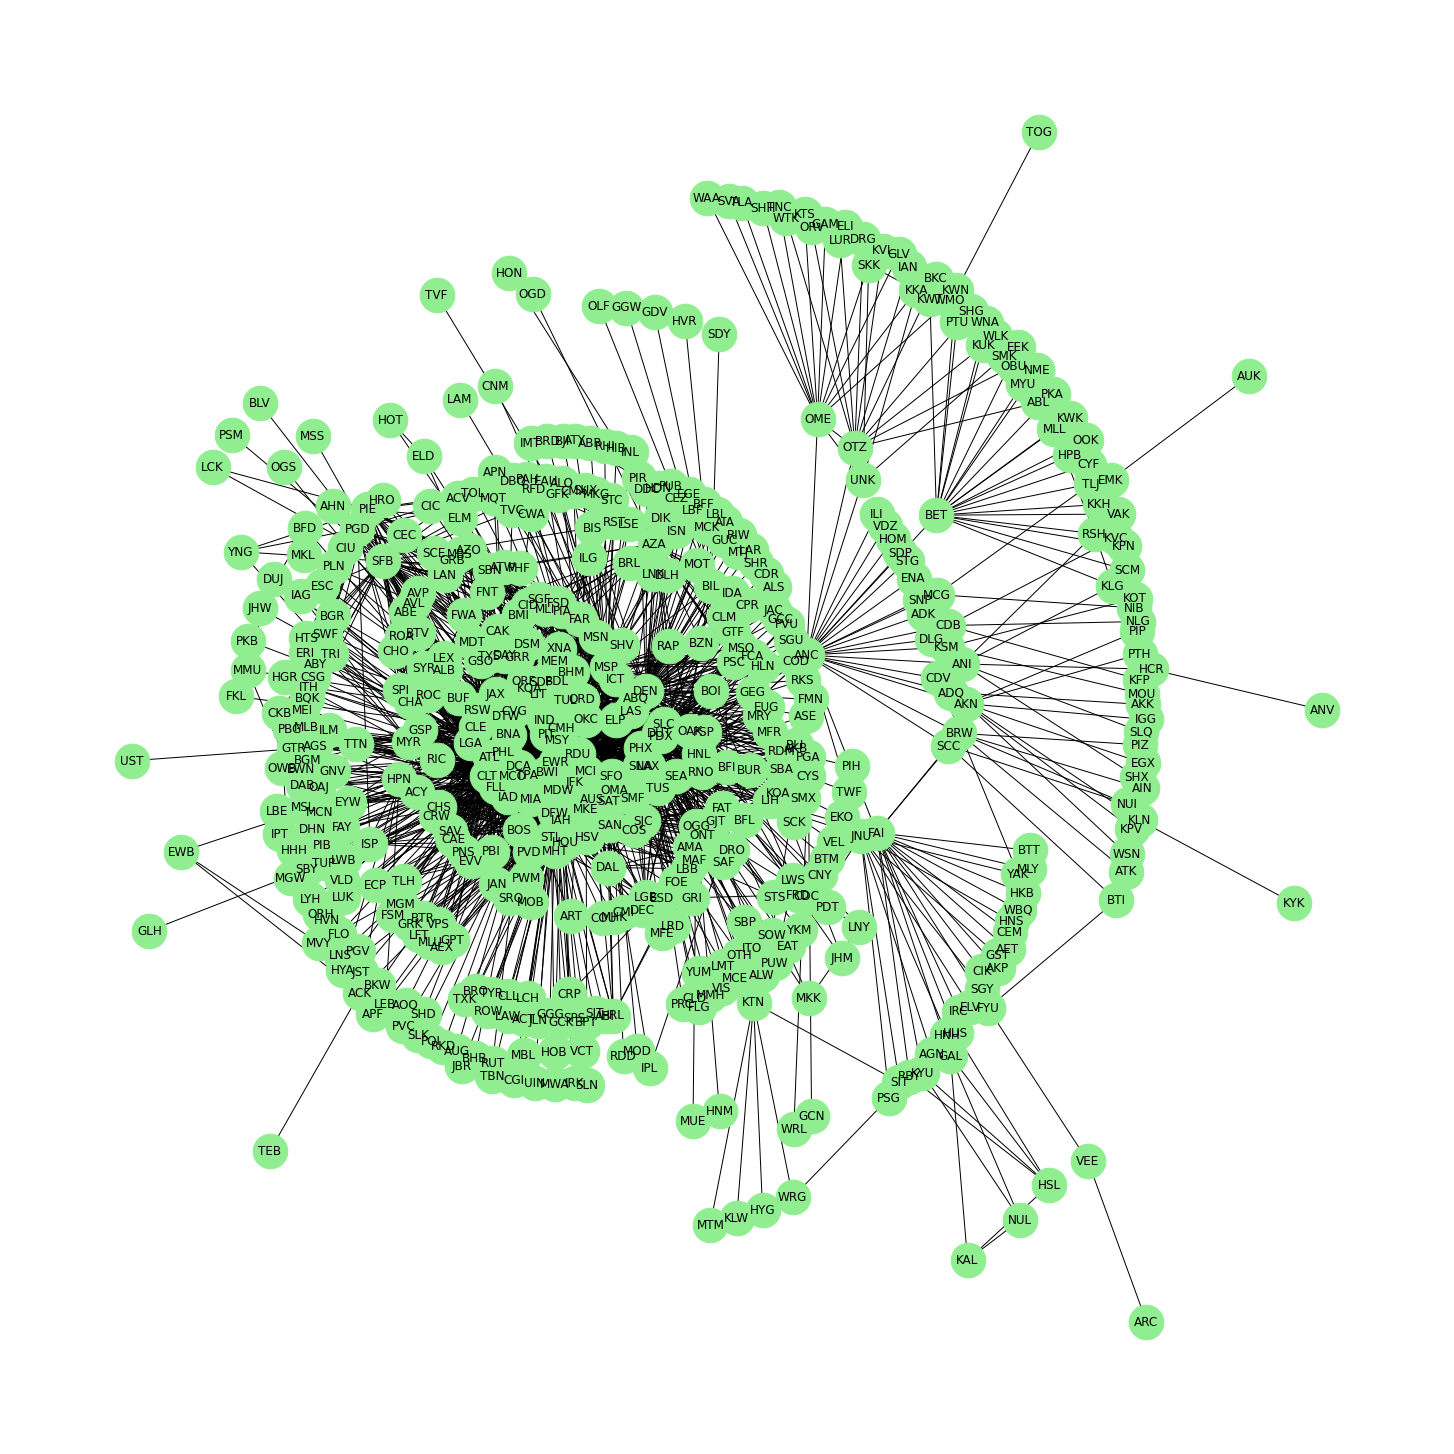

In [9]:
G2 = nx.read_graphml('openflights_usa.graphml.gz')

plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G2)  # positions for all nodes
nx.draw(G2, pos, node_size=1200, node_color='lightgreen', with_labels=True)

In [10]:
G2.nodes['JFK']

{'name': 'John F Kennedy International Airport',
 'latitude': 40.63980103,
 'longitude': -73.77890015,
 'IATA': 'JFK'}

In [11]:
G2.nodes['JFK']['name']

'John F Kennedy International Airport'

# Q3.
Plot the PDF and CCDF of degrees in G2.

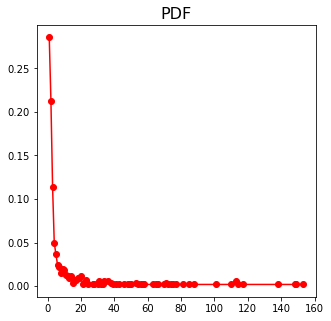

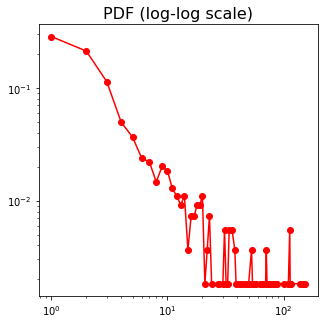

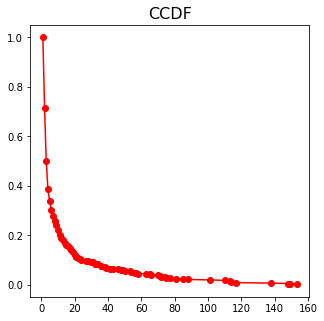

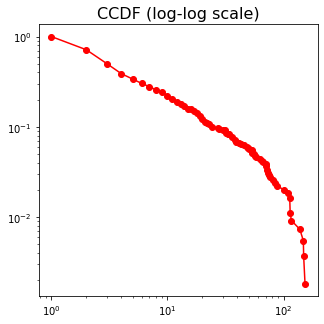

In [12]:
degrees = sorted(dict(G2.degree()).values())
n = len(degrees)
degrees_set = set(degrees)
degrees_count = [degrees.count(i) for i in degrees_set]

probabilities = dict(zip(sorted(list(degrees_set)), degrees_count))
ccdf = probabilities.copy()

for k in probabilities.keys():
    sum = 0
    for i in range(k, max(probabilities.keys())+1, 1):
        try:
            sum += probabilities[i]
        except:
            pass
    ccdf[k] = sum
    
plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.plot(probabilities.keys(), [v/n for v in probabilities.values()], '-ro')
ax.set_title('PDF', fontsize=16)
plt.show()

plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.plot(probabilities.keys(), [v/n for v in probabilities.values()], '-ro')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('PDF (log-log scale)', fontsize=16)
plt.show()

plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.plot(ccdf.keys(), [v/n for v in ccdf.values()], '-ro')
ax.set_title('CCDF', fontsize=16)
plt.show()

plt.figure(figsize=(5,5))
ax = plt.subplot()
ax.plot(ccdf.keys(), [v/n for v in ccdf.values()], '-ro')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('CCDF (log-log scale)', fontsize=16)
plt.show()